# Result Analysis on Preprocessed Data

In [43]:
# Opsional, apabila menggunakan gdrive sebagai tempat menyimpan data
# Sesuaikan juga Path Gdrive dimana file disimpan
import pandas as pd
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
df_prepro = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/DF_Preproces.csv')

In [45]:
df_prepro.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [46]:
df_prepro = df_prepro.drop(columns="Unnamed: 0")

In [47]:
df_prepro.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [ ]:
y = df_prepro.iloc[:,0].values
X = df_prepro.iloc[:,1:].values

In [42]:
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = y.shape[1]
n_classes

8

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)
# Train : Test ==> 8 : 2

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [50]:
from sklearn.svm import LinearSVC

pipe_svc = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LinearSVC()))])

In [51]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(mlp))])

# SVM

In [18]:
pipe_svc = pipe_svc.fit(X_train, y_train)
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [19]:
y_score_svc = pipe_svc.decision_function(X_test)

In [20]:
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()
for i in range(n_classes):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test[:, i], y_score_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

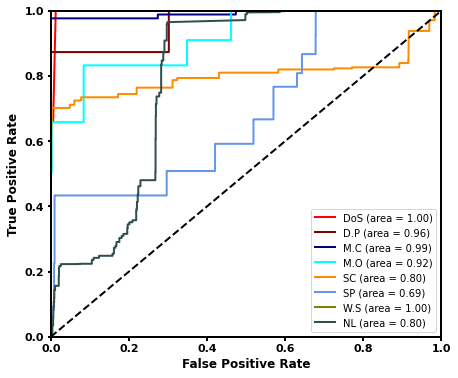

In [21]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svc[i], tpr_svc[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_svc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")

# ANN

In [22]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)

Iteration 1, loss = 0.01747635
Iteration 2, loss = 0.01242359
Iteration 3, loss = 0.01219138
Iteration 4, loss = 0.01213977
Iteration 5, loss = 0.01206942
Iteration 6, loss = 0.01195333
Iteration 7, loss = 0.01190263
Iteration 8, loss = 0.01188070
Iteration 9, loss = 0.01179250
Iteration 10, loss = 0.01184380
Iteration 11, loss = 0.01180049
Iteration 12, loss = 0.01182816
Iteration 13, loss = 0.01178547
Iteration 14, loss = 0.01173279
Iteration 15, loss = 0.01179253
Iteration 16, loss = 0.01172668
Iteration 17, loss = 0.01173873
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.00544625
Iteration 2, loss = 0.00202050
Iteration 3, loss = 0.00149718
Iteration 4, loss = 0.00114145
Iteration 5, loss = 0.00089673
Iteration 6, loss = 0.00071281
Iteration 7, loss = 0.00055928
Iteration 8, loss = 0.00044291
Iteration 9, loss = 0.00035870
Iteration 10, loss = 0.00029026
Iteration 11, loss = 0.00023988
Iteration 12, loss = 0.00021063


In [23]:
y_score_mlp = pipe_mlp.predict_proba(X_test)
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test[:, i], y_score_mlp[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

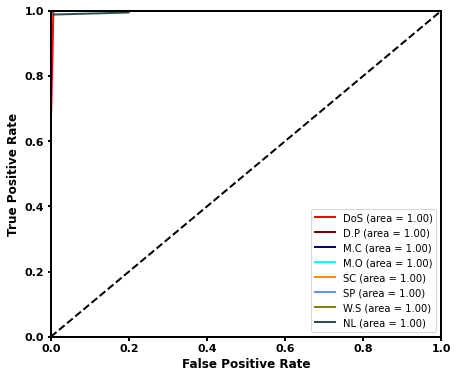

In [24]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_mlp[i], tpr_mlp[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_mlp[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")

================================================================================

In [25]:
y = df_prepro.iloc[:,0].values
X = df_prepro.iloc[:,1:].values

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

target_names = ['Normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)
# Train : Test ==> 8 : 2

# Cross validation Estimation for SVM

In [28]:
from sklearn.svm import LinearSVC

pipe_svc = Pipeline([('scl', StandardScaler()),('clf', LinearSVC())])

In [29]:
train_sizes_svc, train_scores_svc, test_scores_svc = learning_curve(estimator=pipe_svc,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_svc = np.mean(train_scores_svc, axis=1)
train_std_svc = np.std(train_scores_svc, axis=1)
test_mean_svc = np.mean(test_scores_svc, axis=1)
test_std_svc = np.std(test_scores_svc, axis=1)

# Evaluation Metrics Calculations for SVM

In [30]:
pipe_svc = pipe_svc.fit(X_train, y_train)
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.9826332625579706, 0.9827627149422398)

In [31]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.97      0.65      0.78      4602
         DoSattack       0.00      0.00      0.00       279
              scan       0.78      0.04      0.07       720
  malitiousControl       1.00      0.16      0.27       650
malitiousOperation       0.00      0.00      0.00      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.00      0.00      0.00        94
        wrongSetUp       0.98      1.00      0.99    278353

          accuracy                           0.98    286352
         macro avg       0.47      0.23      0.26    286352
      weighted avg       0.98      0.98      0.98    286352



In [32]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.96      0.66      0.78      1178
         DoSattack       0.00      0.00      0.00        63
              scan       0.83      0.06      0.11       169
  malitiousControl       1.00      0.21      0.35       155
malitiousOperation       0.00      0.00      0.00       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.00      0.00      0.00        28
        wrongSetUp       0.98      1.00      0.99     69571

          accuracy                           0.98     71589
         macro avg       0.47      0.24      0.28     71589
      weighted avg       0.98      0.98      0.98     71589



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,     0,     0,     0,     0,     0,     0,    63],
       [    0,     0,    10,     0,     0,     0,     0,   159],
       [    0,     0,     0,    33,     0,     0,     0,   122],
       [    0,     0,     2,     0,     0,     0,     0,   303],
       [    0,     0,     0,     0,     0,     0,     0,   120],
       [    0,     0,     0,     0,     0,     0,     0,    28],
       [   34,     0,     0,     0,     0,     0,     0, 69537]])

# Cross validation Estimation for ANN

In [34]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', mlp)])

In [35]:
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(estimator=pipe_mlp,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_mlp = np.mean(train_scores_mlp, axis=1)
train_std_mlp = np.std(train_scores_mlp, axis=1)
test_mean_mlp = np.mean(test_scores_mlp, axis=1)
test_std_mlp = np.std(test_scores_mlp, axis=1)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


# Evaluation Metrics Calculations for ANN

In [36]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)
y_pred_train = pipe_mlp.predict(X_train)
y_pred_test = pipe_mlp.predict(X_test)

Iteration 1, loss = 0.05584959
Iteration 2, loss = 0.02541104
Iteration 3, loss = 0.01882284
Iteration 4, loss = 0.01670067
Iteration 5, loss = 0.01501241
Iteration 6, loss = 0.01462482
Iteration 7, loss = 0.01410045
Iteration 8, loss = 0.01378341
Iteration 9, loss = 0.01346050
Iteration 10, loss = 0.01328968


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942273844778454, 0.994077302378857)

In [38]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



In [39]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       0.99      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       0.98      1.00      0.99       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       0.99      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



In [40]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,    63,     0,     0,     0,     0,     0,     0],
       [    0,     0,   169,     0,     0,     0,     0,     0],
       [    0,     0,     0,   155,     0,     0,     0,     0],
       [    0,     0,     0,     0,   305,     0,     0,     0],
       [    0,     0,     0,     0,     0,   120,     0,     0],
       [    0,     0,     0,     0,     0,     0,    28,     0],
       [   18,     0,     1,     0,     0,     2,     0, 69550]])